# Mixture of QCBM for clustering

## import dataset

In [1]:
import dataset
nb_point = 1000
dataset1, true_labels1 = dataset.two_moon(nb_point)
dataset2, true_labels2 = dataset.two_gauss_moon(nb_point)
dataset3, true_labels3 = dataset.two_gauss(nb_point)
data = [dataset1, dataset2, dataset3]
true_labels = [true_labels1, true_labels2, true_labels3]
nb_dataset = len(data)

In [2]:
dataset_path = ["/two_moon", "/two_gauss", "/gauss_moon"]

In [3]:
#from qiskit.primitives import BackendSampler
#from qiskit.providers.fake_provider import FakeVigo
#device_backend = FakeVigo()
#sampler_test = BackendSampler(device_backend)
#models.append(generator.noisy_QCBM(sampler_test))
#name_methode.append("mixture of QCBM noisy")

# clustering

In [4]:
from sklearn.cluster import KMeans, DBSCAN
from function_clustering import clustering
import matplotlib.pyplot as plt
import time
time_ = []
labels = []
save = 1

## k_means

In [5]:
name_methode = ["k-mean"]
label0 = []
start = time.time()
for X in data:
    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
    l = kmeans.labels_
    label0.append(l)
end = time.time()
time_.append(end-start)
labels.append(label0)

In [6]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label0[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.50
Davies-Bouldin Index: 0.80
Calinski-Harabasz Index: 1429.55
Adjusted Rand Index: 0.5121677
Normalized Mutual Information (NMI): 0.4106779

dataset  1
Silhouette Score: 0.49
Davies-Bouldin Index: 0.92
Calinski-Harabasz Index: 876.60
Adjusted Rand Index: 0.6174306
Normalized Mutual Information (NMI): 0.6022028

dataset  2
Silhouette Score: 0.62
Davies-Bouldin Index: 0.48
Calinski-Harabasz Index: 1824.34
Adjusted Rand Index: 0.9201129
Normalized Mutual Information (NMI): 0.8553603



## DBSCAN

In [7]:
name_methode.append("DBSCAN")
start = time.time()
label1 = []
for X in data:
    dbscan =  DBSCAN(eps=0.05, min_samples=15).fit(X)
    l = dbscan.labels_
    l[l==-1] = 2
    l[l==0] = 3
    label1.append(l)
end = time.time()
time_.append(end-start)
labels.append(label1)

In [8]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label1[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.23
Davies-Bouldin Index: 1.83
Calinski-Harabasz Index: 464.90
Adjusted Rand Index: 0.9940060
Normalized Mutual Information (NMI): 0.9842222

dataset  1
Silhouette Score: 0.31
Davies-Bouldin Index: 4.10
Calinski-Harabasz Index: 357.92
Adjusted Rand Index: 0.8991372
Normalized Mutual Information (NMI): 0.8605857

dataset  2
Silhouette Score: 0.43
Davies-Bouldin Index: 2.19
Calinski-Harabasz Index: 717.40
Adjusted Rand Index: 0.6518562
Normalized Mutual Information (NMI): 0.6516097



## Network Mixture

In [9]:
name_methode.append("Network Mixture")
from generator.NN import NN
model = NN
epoch_init = 50
taille_batch_init = 50
learning_rate_init = 0.001
epoch_EM = 200
taille_batch_EM = 50
learning_rate_EM = 1e-3
label2 = []
start = time.time()
i=0
for X in data:
    print("dataset ",i)
    path = "./NetworkMixture" + dataset_path[i]
    label2.append(clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path))
    i+=1
end = time.time()
time_.append(end-start)
labels.append(label2)

dataset  0
dataset  1
dataset  2


In [10]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label2[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.40
Davies-Bouldin Index: 0.99
Calinski-Harabasz Index: 924.77
Adjusted Rand Index: 0.9960000
Normalized Mutual Information (NMI): 0.9895915

dataset  1
Silhouette Score: 0.47
Davies-Bouldin Index: 1.01
Calinski-Harabasz Index: 699.37
Adjusted Rand Index: 0.9960000
Normalized Mutual Information (NMI): 0.9895915

dataset  2
Silhouette Score: 0.62
Davies-Bouldin Index: 0.45
Calinski-Harabasz Index: 1782.80
Adjusted Rand Index: 0.9771937
Normalized Mutual Information (NMI): 0.9414617



### Continuous QCBM Mixture

In [35]:
name_methode.append("Continuous QCBM \nMixture")
from generator.Continuous_QCBM import Continuous_QCBM
model = Continuous_QCBM()
epoch_init = 30
taille_batch_init = 50
learning_rate_init = 1e-2
epoch_EM = 50
taille_batch_EM = 50
learning_rate_EM = 5e-3
label3 = []
start = time.time()
i=0
for X in data:
    print("dataset ",i)
    path = "./ContinusMixture" + dataset_path[i]
    label3.append(clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path))
    i+=1
end = time.time()
time_.append(end-start)
labels.append(label3)

dataset  0
dataset  1
dataset  2


In [36]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label3[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.47
Davies-Bouldin Index: 0.85
Calinski-Harabasz Index: 1248.78
Adjusted Rand Index: 0.7566564
Normalized Mutual Information (NMI): 0.6531081

dataset  1
Silhouette Score: 0.45
Davies-Bouldin Index: 1.03
Calinski-Harabasz Index: 655.80
Adjusted Rand Index: 0.9215216
Normalized Mutual Information (NMI): 0.8782064

dataset  2
Silhouette Score: 0.61
Davies-Bouldin Index: 0.49
Calinski-Harabasz Index: 1766.64
Adjusted Rand Index: 0.9201129
Normalized Mutual Information (NMI): 0.8553603



### Discrete QCBM Mixture

In [45]:
name_methode.append("Discrete QCBM \nMixture")
from generator.Discrete_QCBM import Discrete_QCBM
model = Discrete_QCBM(16,2*(0,1))
epoch_init = 500
taille_batch_init = 500
learning_rate_init = 5e-3
epoch_EM = 500
taille_batch_EM = 500
learning_rate_EM = 5e-3
label4 = []
start = time.time()
i=0
for X in data:
    print("dataset ",i)
    path = "./DiscreteMixture" + dataset_path[i]
    label4.append(clustering(X, 2, model, epoch_init, taille_batch_init, learning_rate_init, epoch_EM, taille_batch_EM, learning_rate_EM, VAL=[], PRINT=0, SAVE=save, PATH=path))
    i+=1
end = time.time()
time_.append(end-start)
labels.append(label4)

dataset  0
dataset  1
dataset  2


In [46]:
i=0
for X in data:
    print("dataset ",i)
    dataset.display_metrics(X, label4[i], true_labels[i])
    print("")
    i=i+1

dataset  0
Silhouette Score: 0.50
Davies-Bouldin Index: 0.80
Calinski-Harabasz Index: 1422.97
Adjusted Rand Index: 0.4783418
Normalized Mutual Information (NMI): 0.3802396

dataset  1
Silhouette Score: 0.48
Davies-Bouldin Index: 0.90
Calinski-Harabasz Index: 838.62
Adjusted Rand Index: 0.4811653
Normalized Mutual Information (NMI): 0.5044209

dataset  2
Silhouette Score: 0.62
Davies-Bouldin Index: 0.45
Calinski-Harabasz Index: 1795.54
Adjusted Rand Index: 0.9682587
Normalized Mutual Information (NMI): 0.9299969



# Result

In [49]:
labels = [label0,label1,label2,label3,label4]

3 5


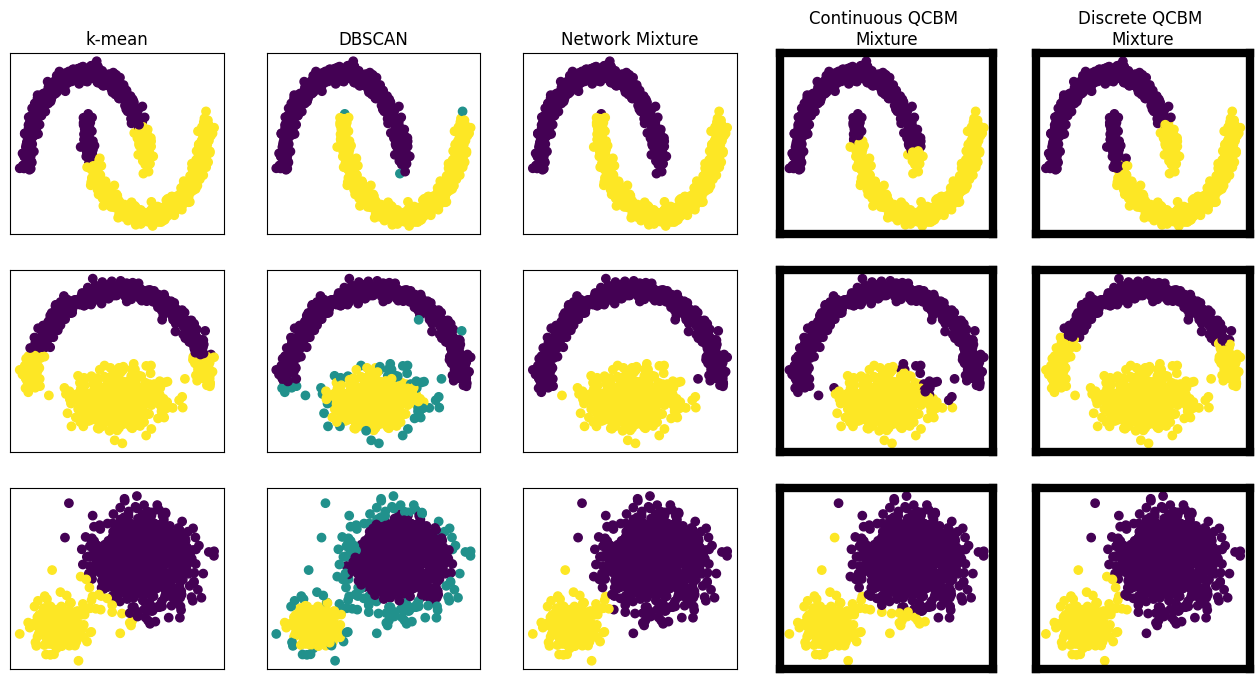

In [50]:
n = len(data)
m = 5
print(n, m)
f, axis = plt.subplots(n, m, figsize=(16, 8)) 
for j in range(m):
    axis[0,j].set_title(name_methode[j], fontsize=12)
    for i in range(n):
        axis[i,j].scatter(data[i][:,0],data[i][:,1], c=labels[j][i])
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])

for i in [0,1,2]:
    for j in [3,4]:
        for axis_ in ['top','bottom','left','right']:
            axis[i,j].spines[axis_].set_linewidth(6)

#f.suptitle(" ", fontsize=20)
f.savefig('./img/resClustering.png')
plt.show()

In [26]:
print("time")

for i in range(m):
    print(name_methode[i], " -  mean time :", time_[i]/nb_dataset, "s")

time
k-mean  -  mean time : 0.009641329447428385 s
DBSCAN  -  mean time : 0.021131118138631184 s
Network Mixture  -  mean time : 10.892479737599691 s
Continuous QCBM 
Mixture  -  mean time : 1402.0919320583344 s
Discrete QCBM 
Mixture  -  mean time : 261.36731791496277 s


# generative

In [51]:
import torch
import function_train
data_tot = []
labels2 = []
name_methode2 = []
nb_point_gen = 600

In [52]:
name_methode2.append("Continuous QCBM\nMixture")
model = Continuous_QCBM()
data_gen = []
label = []

i=0
for X in data:
    models = function_train.mixture_generator(2, model, 2)
    path = "./ContinusMixture" + dataset_path[i]
    models.load(path)
    res, l = function_train.point(models, X, nb_point*[0], nb_point_gen, 2)
    data_gen.append(res)
    label.append(l)
    i+=1
data_tot.append(data_gen)
labels2.append(label)

In [53]:
name_methode2.append("Discrete QCBM\nMixture")
model = Discrete_QCBM(16,2*(0,1))
data_gen = []
label = []

i=0
for X in data:
    models = function_train.mixture_generator(2, model, 2)
    path = "./DiscreteMixture" + dataset_path[i]
    models.load(path)
    res, l = function_train.point(models, X, nb_point*[0], nb_point_gen, 2)
    data_gen.append(res)
    label.append(l)
    i+=1
data_tot.append(data_gen)
labels2.append(label)

3 2


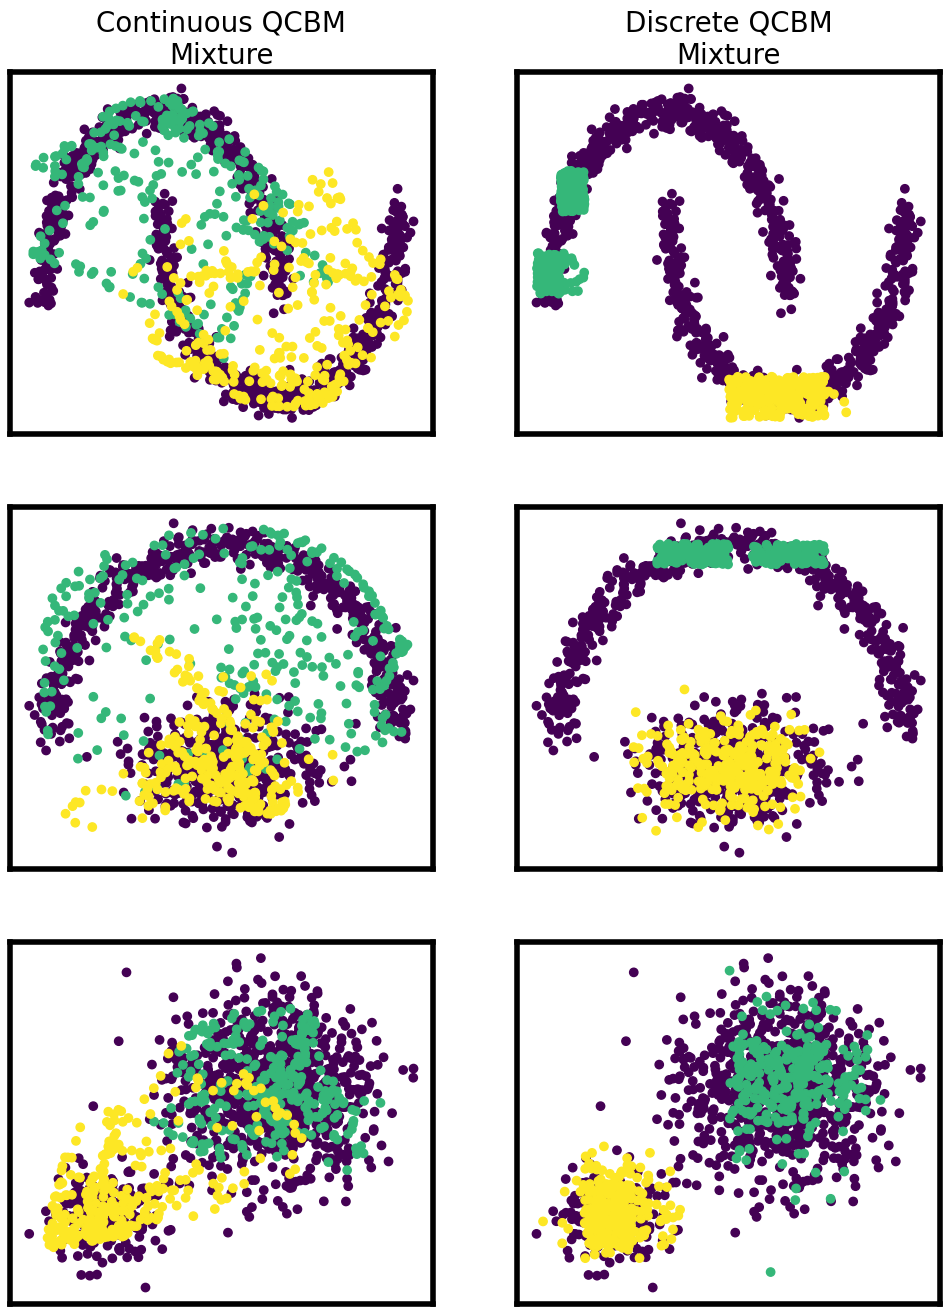

In [54]:
n = len(data)
m = 2
print(n, m)
f, axis = plt.subplots(n, m, figsize=(12, 16)) 
for j in range(m):
    axis[0,j].set_title(name_methode2[j], fontsize=20)
    for i in range(n):
        axis[i,j].scatter(data_tot[j][i][:,0],data_tot[j][i][:,1], c=labels2[j][i])
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        for axis_ in ['top','bottom','left','right']:
            axis[i,j].spines[axis_].set_linewidth(4)


#f.suptitle(" ", fontsize=20)
f.savefig('./img/resGenerative.png')
plt.show()